<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/practise_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [174]:
class neuralnetwork:
  def __init__(self,input_size,hidden_size,output_size,learning_rate=0.01,epochs=100):
    self.input_size=input_size
    self.hidden_size=hidden_size
    self.output_size=output_size
    self.learning_rate=learning_rate
    self.epochs=epochs
    #initialise w/b from input layer to hidden layer
    self.w1=np.random.randn(self.input_size,self.hidden_size)
    self.b1=np.zeros((1,self.hidden_size))
    #initialise w/b from hidden layer to output layer
    self.w2=np.random.randn(self.hidden_size,self.output_size)
    self.b2=np.zeros((1,self.output_size))
    #loss history for plotting
    self.loss_history=[]
  #sigmoid fn
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  #forward propogation
  def forward(self,x):
    self.z1=np.dot(x,self.w1)+self.b1
    self.a1=self.sigmoid(self.z1)
    self.z2=np.dot(self.a1,self.w2)+self.b2
    self.probs=self.sigmoid(self.z2)
    return self.probs
  #back propogation
  def backward(self,x,y):
    m=x.shape[0]
    delta3=self.probs-y.reshape(-1,1)
    dw2=np.dot(self.a1.T,delta3)
    db2=np.sum(delta3,axis=0,keepdims=True)

    #gradient of loss wrt w/b of hidden layer
    delta2=np.dot(delta3,self.w2.T)*self.a1*(1-self.a1)
    dw1=np.dot(x.T,delta2)
    db1=np.sum(delta2,axis=0)
    #update weight
    self.w1-=self.learning_rate*dw1
    self.b1-=self.learning_rate*db1
    self.w2-=self.learning_rate*dw2
    self.b2-=self.learning_rate*db2
  #training
  def train(self,x,y):
    for epoch in range(self.epochs):
      probs=self.forward(x)
      loss=-np.mean(y*np.log(probs)+(1-y)*np.log(1-probs))
      self.loss_history.append(loss)
      self.backward(x,y)
      if epoch % 100==0:
        print(f"Epoch {epoch}, Loss {loss:.4f}")
   #prdeict
  def predict(self,x):
    probs=self.forward(x)
    return np.where(probs>=0.5,1,0)



In [175]:
# #sigmoid fn
# def sigmoid(self,x):
#   return 1/(1+np.exp(-x))

In [176]:
# #forward propogation
# def forward(self,x):
#   self.z1=np.dot(x,self.w1)+self.b1
#   self.a1=self.sigmoid(self.z1)
#   self.z2=np.dot(self.a1,self.w2)+self.b2
#   self.probs=self.sigmoid(self.z2)
#   return self.probs


In [177]:
# #back propogation
# def backward(self,x,y):
#   m=x.shape[0]
#   delta3=self.probs-y.reshape(-1,1)
#   dw2=np.dot(self.a1.T,delta3)
#   db2=np.sum(delta3,axis=0,keepdims=True)

#   #gradient of loss wrt w/b of hidden layer
#   delta2=np.dot(delta3,self.w2.T)*self.a1*(1-self.a1)
#   dw1=np.dot(x.T,delta2)
#   db1=np.sum(delta2,axis=0)
#   #update weight
#   self.w1-=self.learning_rate*dw1
#   self.b1-=self.learning_rate*db1
#   self.w2-=self.learning_rate*dw2
#   self.b2-=self.learning_rate*db2

In [178]:
# #training
# def train(self,x,y):
#   for epoch in range(self.epochs):
#     probs=self.forward(x)
#     loss=-np.mean(y*np.log(probs)+(1-y)*np.log(1-probs))
#     self.loss_history.append(loss)
#     self.backward(x,y)
#     if epoch % 100==0:
#       print(f"Epoch {epoch}, Loss {loss:.4f}")

In [179]:
# #prdeict
# def predict(self,x):
#   probs=self.forward(x)
#   return np.where(probs>=0.5,1,0)

In [180]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [181]:
x

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1],
       [3.7, 0.2],
       [3.4, 0.2],
       [3. , 0.1],
       [3. , 0.1],
       [4. , 0.2],
       [4.4, 0.4],
       [3.9, 0.4],
       [3.5, 0.3],
       [3.8, 0.3],
       [3.8, 0.3],
       [3.4, 0.2],
       [3.7, 0.4],
       [3.6, 0.2],
       [3.3, 0.5],
       [3.4, 0.2],
       [3. , 0.2],
       [3.4, 0.4],
       [3.5, 0.2],
       [3.4, 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.4, 0.4],
       [4.1, 0.1],
       [4.2, 0.2],
       [3.1, 0.2],
       [3.2, 0.2],
       [3.5, 0.2],
       [3.6, 0.1],
       [3. , 0.2],
       [3.4, 0.2],
       [3.5, 0.3],
       [2.3, 0.3],
       [3.2, 0.2],
       [3.5, 0.6],
       [3.8, 0.4],
       [3. , 0.3],
       [3.8, 0.2],
       [3.2, 0.2],
       [3.7, 0.2],
       [3.3, 0.2],
       [3.2, 1.4],
       [3.2, 1.5],
       [3.1,

In [182]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [183]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_file',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',


In [184]:
#load iris
iris=load_iris()

In [185]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [186]:
x=iris.data

In [187]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [188]:
x=x[ : ,[1,3]]

In [189]:
y=iris.target

In [190]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [191]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [192]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [193]:
df.shape

(150, 4)

In [194]:
df1=pd.Series(load_iris())

In [195]:
df1

,0
data,"[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [..."
target,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
frame,None
target_names,"[setosa, versicolor, virginica]"
DESCR,.. _iris_dataset:\n\nIris plants dataset\n----...
feature_names,"[sepal length (cm), sepal width (cm), petal le..."
filename,iris.csv
data_module,sklearn.datasets.data


In [196]:
x

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1],
       [3.7, 0.2],
       [3.4, 0.2],
       [3. , 0.1],
       [3. , 0.1],
       [4. , 0.2],
       [4.4, 0.4],
       [3.9, 0.4],
       [3.5, 0.3],
       [3.8, 0.3],
       [3.8, 0.3],
       [3.4, 0.2],
       [3.7, 0.4],
       [3.6, 0.2],
       [3.3, 0.5],
       [3.4, 0.2],
       [3. , 0.2],
       [3.4, 0.4],
       [3.5, 0.2],
       [3.4, 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.4, 0.4],
       [4.1, 0.1],
       [4.2, 0.2],
       [3.1, 0.2],
       [3.2, 0.2],
       [3.5, 0.2],
       [3.6, 0.1],
       [3. , 0.2],
       [3.4, 0.2],
       [3.5, 0.3],
       [2.3, 0.3],
       [3.2, 0.2],
       [3.5, 0.6],
       [3.8, 0.4],
       [3. , 0.3],
       [3.8, 0.2],
       [3.2, 0.2],
       [3.7, 0.2],
       [3.3, 0.2],
       [3.2, 1.4],
       [3.2, 1.5],
       [3.1,

In [197]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [198]:
#binary classification
y_binary=np.where(y==1,1,0)
y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [199]:
#split
x_train,x_test,y_train,y_test=train_test_split(x,y_binary,test_size=0.3,random_state=42)

In [200]:
x_train.shape

(105, 2)

In [201]:
x_test.shape

(45, 2)

In [202]:
#standardise
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [203]:
#create object
mlp_nn=neuralnetwork(input_size=2,hidden_size=5,output_size=1,learning_rate=0.01,epochs=1000)

In [204]:
#train model
mlp_nn.train(x_train_std,y_train)

Epoch 0, Loss 1.1991
Epoch 100, Loss 0.8506
Epoch 200, Loss 0.9664
Epoch 300, Loss 1.2057
Epoch 400, Loss 1.4112
Epoch 500, Loss 1.5495
Epoch 600, Loss 1.6462
Epoch 700, Loss 1.7169
Epoch 800, Loss 1.7709
Epoch 900, Loss 1.8134


In [206]:
y_pred=mlp_nn.predict(x_test_std)

In [207]:
#performance
accuracy=np.mean(y_pred==y_test)

In [208]:
print(f'accuracy:{accuracy*100:.2f}%')

accuracy:59.85%


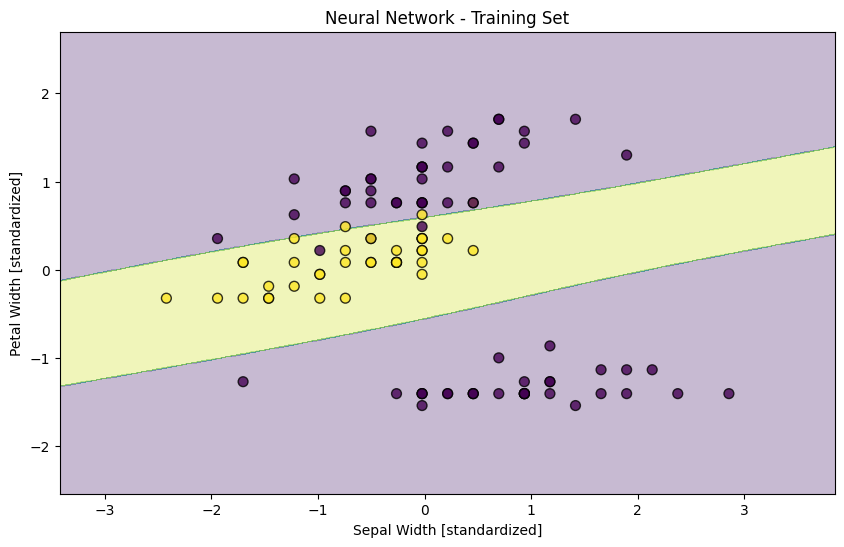

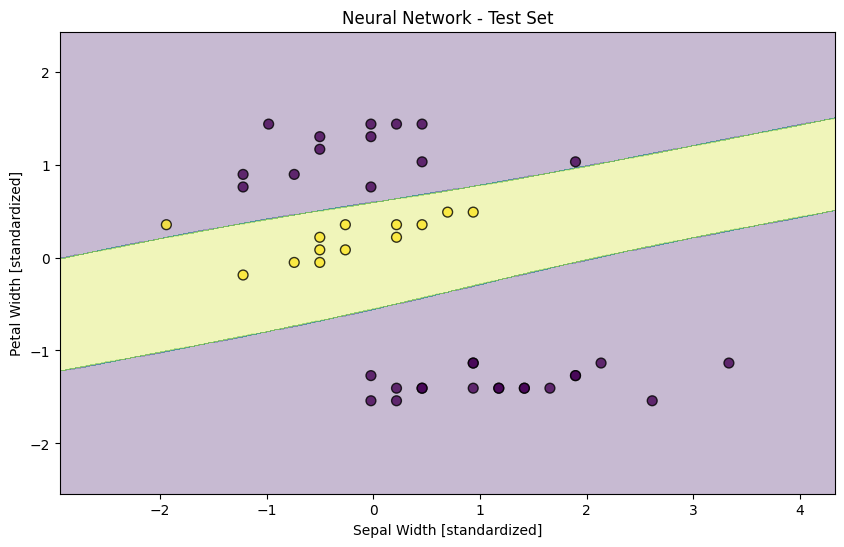

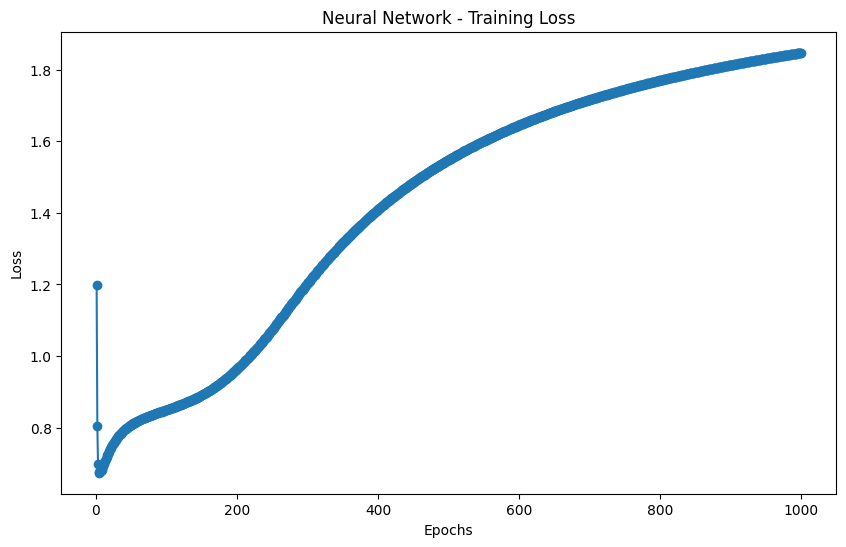

In [209]:
# Function to plot decision regions
def plot_decision_regions(x, y, model):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    plt.contourf(xx, yy, z, alpha=0.3)
    plt.scatter(x[:, 0], x[:, 1], c=y, marker='o', edgecolor='k', s=50, alpha=0.8)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plotting the decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(x_train_std, y_train, mlp_nn)
plt.title('Neural Network - Training Set')
plt.xlabel('Sepal Width [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.show()

plt.figure(figsize=(10, 6))
plot_decision_regions(x_test_std, y_test, mlp_nn)
plt.title('Neural Network - Test Set')
plt.xlabel('Sepal Width [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.show()

# Plotting the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mlp_nn.loss_history) + 1), mlp_nn.loss_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network - Training Loss')
plt.show()